In [1]:
from hyperneat.spatial_node import SpatialNode, SpatialNodeType
from hyperneat.substrate import Substrate
from hyperneat.evolution import Hyperneat

from neat.genes import ConnectionGene, NodeGene, NodeType
from neat.genome import Genome
from neat.activation_functions import ActivationFunction
from neat.neural_network import NeuralNetwork

import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Genome
genome = Genome(num_layers=15, weights_range=[-3.0, 3.0])
genome.create_genome_by_size(8, 3)
net = genome.build_phenotype()

# Substrate setting
# Init substrate set
substrate_set = []
for i in range(2):
	s = Substrate()
	s.activation_function = ActivationFunction().get('TANH')

	# Must create new objects or deep copies
	s.input_nodes = [SpatialNode(0, SpatialNodeType.INPUT, [0.0, -0.5], ActivationFunction().get('TANH'), 0)]
	s.output_nodes = [SpatialNode(1, SpatialNodeType.OUTPUT, [-0.5, 0.5], ActivationFunction().get('TANH'), 2),
					  SpatialNode(2, SpatialNodeType.OUTPUT, [0.5, 0.5], ActivationFunction().get('TANH'), 2)]
	s.hidden_nodes = [SpatialNode(3, SpatialNodeType.HIDDEN, [-0.5, 0.0], ActivationFunction().get('TANH'), 1),
					  SpatialNode(4, SpatialNodeType.HIDDEN, [0.5, 0.0], ActivationFunction().get('TANH'), 1)]

	s.input_count = 1
	s.output_count = 2
	s.hidden_count = 2

	s.extend_nodes_list()
	substrate_set.append(s)

substrate_set[0].coordinates = (-0.5, 0.5)
substrate_set[1].coordinates = (0.5, 0.5)

intra_substrate_conn = [[0, 1], [0, 2], [0, 3], [0, 4], [3, 1], [3, 2], [3, 4], [4, 1], [4, 2], [4, 3]]
inter_substrate_conn = [[0, 4, 1, 3], [1, 3, 0, 4]]

ea = Hyperneat()
ea.connection_threshold = 0.05
ea.max_connection_weight = 0.5
ea.max_bias = 0.06
ea.max_delay = 0.2

net = ea.build_modular_substrate(genome, substrate_set, intra_substrate_conn, inter_substrate_conn)
net.reset_values()

time = np.linspace(0, 20, 20 / 0.05)
signal_1 = np.sin(time)
signal_2 = np.cos(time)

In [2]:
output_signal = np.zeros([4, time.shape[0]])
out_id = net.out_neurons

for t, _ in enumerate(time):
    net.input([signal_1[t], signal_2[t]])
    net.activate_net(0.05)
    for o, oid in enumerate(out_id):
        output_signal[o, t] = net.neurons[oid].output

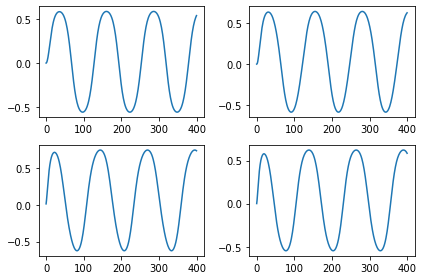

In [3]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(output_signal[0])
ax[0, 1].plot(output_signal[1])
ax[1, 0].plot(output_signal[2])
ax[1, 1].plot(output_signal[3])
plt.tight_layout()

In [4]:
net.neurons[net.out_neurons[0]].max_output

2.0